# Linear Regression with Boston Housing


Utilizes the `General Modeling Framework: Simple.ipynb` notebook!

-------------------------------------------------

This is an (applied) bare-bones script to get you up and running with regression modeling. For a given dataset, you should be able to code relevant content in the cells below. 

## Getting started
Import modules, mount Drive, read in the data, check data types and missing values. You may also do some light EDA prior to modeling.

Notice how we are using the same functions over and over again... it really is like following a recipe.


In [ ]:
# import modules we need for EDA and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling
from sklearn.linear_model import LinearRegression

# regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read in some data
df = pd.read_csv('/content/drive/MyDrive/Online Materials/Module 2: Dirty Data and Parametric Models/Week 2: Linear Models/data/Boston Housing.csv')

In [ ]:
# data type, shape and columns

print("This is the shape :\n", df.shape, '\n') # escape characters are fun! \n adds a return line
print("These are the column names: \n", df.columns, '\n') # helps keep things nice and clean
print("These are the data types: \n", df.dtypes)

# right away you see this 'valid' column is an 'object', which means it's a string
# AKA something you can't do math on... look at the head and see what's going on
# in that column. ALL OTHER DATA IS NUMERIC (float64)
# this is a good quiz question... ;)

print("\nThis is the head:") # see how I can pop that \n anywhere?
df.head()   # also note how much stuff I have pasted in ONE CELL...
            # now you are cooking with gas!

# the head confirms to use that the valid column is some type of time/date stamp
# we need to stop what we are doing and take care of this NOW!

This is the shape :
 (506, 14) 

These are the column names: 
 Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object') 

These are the data types: 
 crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

This is the head:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# here's another cool way to get a lot of this info AND MORE
df.info() # gives you missing values report too - this is nice complete data

# data types, shape, missing values per columm.... pandas rocks...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Data splitting
Subset your data into X features and Y target variable for modeling. Convert X and Y to numpy arrays. Then use train_test_split for data splitting (80/20 is very common); don't forget random seed and shuffle.

In [ ]:
# the target variable is Y
# we know that this is 'medv'
Y = df['medv']
print(Y.shape) # a single column with 506 rows

(506,)


In [ ]:
# everything else is X 
# so just drop 'medv' and you are done
X = df.drop('medv', axis=1)
print(X.shape) # note that we have gone from 14 to 13 columns, this is good! 506 rows.

(506, 13)


In [ ]:
# verify that 'medv' is not there
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [ ]:
# now, split the data in ONE LINE OF CODE
# notice how we are assigning four different variables at once
# this makes it really clean

# be careful of capital vs. lowercase X and Y, you might get an error...
# notice the 80/20 split we perform

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

In [ ]:
# check your work - does the shape match what you think it should be?
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [ ]:
# convert these all to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# a numpy array is just a bare-bones matrix filled with numbers
# it is great for modeling
X_train

array([[1.50234e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.49480e+02, 2.49100e+01],
       [6.27390e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.95620e+02, 8.47000e+00],
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       ...,
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [1.11604e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [2.28760e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        7.08000e+01, 1.06300e+01]])

## Min/Max Scaling
This will ensure all of your X data is between 0 (min) and 1 (max). You will use fit_transform() on the train data first, then fit on the test data. If you don't do this step after splitting, you will have data leakage. 

Only scale the X data, not the Y data!

Do yourself a favor and just overwrite X_train and X_test when standardizing, as I do below. Min/max scaling requires that the data are numpy arrays and all numeric data.


**Like this example:**
```
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```
Formula link: http://rasbt.github.io/mlxtend/user_guide/preprocessing/minmax_scaling/ 

$(X - min(X)) / range(X)$

In [ ]:
# you probably have already imported the MinMaxScale at the top of your script
# you should convert to numpy array before scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# take that coordinate system you just learned on X_train, and APPLY it to X_test
X_test = scaler.transform(X_test)

In [ ]:
# if you wanted to run summary stats on these to check the range,
# you would need to convert to a pandas dataframe.
tmp = pd.DataFrame(X_train)
tmp.describe() # notice how all the max values are 1, all min values are 0.

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.040465,0.115693,0.379446,0.071782,0.352848,0.498859,0.676173,0.243577,0.363323,0.414184,0.608332,0.897570,0.296009
std,0.099757,0.231525,0.255356,0.258447,0.242190,0.144285,0.288310,0.193802,0.373466,0.317123,0.237096,0.230890,0.196203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000814,0.000000,0.162593,0.000000,0.137860,0.412345,0.439238,0.087140,0.130435,0.175573,0.446809,0.945969,0.139142
50%,0.002836,0.000000,0.289630,0.000000,0.314815,0.477324,0.770340,0.186066,0.173913,0.272901,0.648936,0.985892,0.253725
75%,0.035900,0.200000,0.642963,0.000000,0.506173,0.564114,0.934604,0.388400,0.478261,0.914122,0.808511,0.997113,0.404042
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# if you wanted to run summary stats on these to check the range,
# you would need to convert to a pandas dataframe.
tmp = pd.DataFrame(X_test)
tmp.describe() # notice how all the max values are 1, all min values are 0.

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.040710,0.105490,0.407324,0.058824,0.334586,0.467324,0.677117,0.237644,0.404945,0.453993,0.680747,0.902520,0.322799
std,0.083847,0.240832,0.248984,0.236456,0.223462,0.135006,0.297537,0.182847,0.398343,0.338669,0.191551,0.228559,0.199906
min,-0.000031,0.000000,-0.010370,0.000000,0.014403,-0.061420,0.033986,0.003592,0.000000,0.001908,0.042553,0.016037,0.031733
25%,0.000880,0.000000,0.198611,0.000000,0.130144,0.408227,0.421215,0.103152,0.130435,0.180821,0.617021,0.944828,0.164390
50%,0.002257,0.000000,0.364815,0.000000,0.302469,0.469290,0.739444,0.202221,0.173913,0.301527,0.702128,0.988161,0.292632
75%,0.050731,0.000000,0.642963,0.000000,0.486626,0.532083,0.950824,0.330568,1.000000,0.914122,0.808511,1.000000,0.449434
max,0.514089,0.950000,1.000000,1.000000,1.000000,0.848281,1.000000,0.871218,1.000000,1.000000,1.000000,1.000000,0.972682


## Fit The Model
Fit the model and make new variables to save your train and test predictions. Make sure you are using the appropriate regression or classification model.

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

![linear regression image](https://nextjournal.com/data/QmfPuPp4V74FyvTTojMj6ix9T8Skj1ji4GhX5Pr6zK8w4N?content-type=image%2Fpng&filename=linear-regression.png)

![linear regression 2](https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/GUID-1BEA85FC-9112-4ADF-8D31-572864E2F630-web.png)

In [ ]:
# make a variable to store the general model
LR = LinearRegression()
# fit the model - one line of code - LR is now a 'model object'
LR = LR.fit(X_train, y_train) # order matters here! don't reverse it!

In [ ]:
# store the predictions
train_preds = LR.predict(X_train) # 404 rows, 1 column... same dimensionality as y_train
test_preds = LR.predict(X_test)  # 102 rows, 1 column... same dimensionality as y_test

## Evaluate the Model
Look at the appropriate error metrics depending on the problem you are solving. 

For a regression problem, look at the R2, MAE and MSE; then make a scatterplot of actual vs. predicted values with nice labels and titles.

For a classification problem, create the classification report (gives a confusion matrix and useful metrics in one line of code).

In [ ]:
# this is a regression problem, and there are three metrics to look at.
# 1) R2 value - look at the documentation: actual, predicted
print("This is train R2:", r2_score(y_train, train_preds)) # train
print("This is test R2:", r2_score(y_test, test_preds)) # test

# bigger numbers are better, values will be between 0 and 1

This is train R2: 0.7508856358979673
This is test R2: 0.6687594935356318


In [ ]:
# 2) mae- look at the documentation: actual, predicted
trainMAE = mean_absolute_error(y_train, train_preds)
print("This is trainMAE:", trainMAE) # train
testMAE = mean_absolute_error(y_test, test_preds)
print("This is testMAE:", testMAE) # test

# values between 0 and +Inf
# values closer to 0 are better

This is trainMAE: 3.3147716267832306
This is testMAE: 3.189091965887848


In [ ]:
# 3) mse- look at the documentation: actual, predicted
trainMSE = mean_squared_error(y_train, train_preds)
print("This is trainMSE:", trainMSE)
testMSE = mean_squared_error(y_test, test_preds)
print("This is testMSE:", testMSE)

# values between 0 and +Inf
# values closer to 0 are better

This is trainMSE: 21.641412753226312
This is testMSE: 24.291119474973534


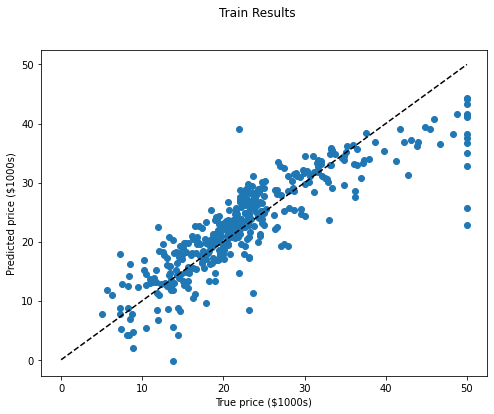

In [ ]:
# a quick scatterplot for train results
# let's see how it fit
plt.figure(figsize=(8, 6))
plt.scatter(x=y_train, y=train_preds)
plt.plot([0, 50], [0, 50], '--k') # 45 degree line
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.suptitle('Train Results')
plt.show()

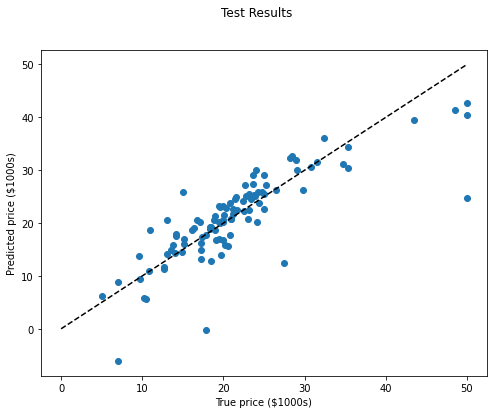

In [ ]:
# a quick scatterplot for test results
# same code as above, just different labels
# a quick scatterplot for train results
# let's see how it fit
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test, y=test_preds)
plt.plot([0, 50], [0, 50], '--k') # 45 degree line
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.suptitle('Test Results')
plt.show()

# Done!
You have just completed a very simple ML framework for regression modeling. Even though you used a linear regression, you still got great results. 

Later on, you will expand on these topics and start fitting multiple models, and may start tweaking them ('hyperparameter tuning') to get even better peformance. Sit tight!

If you want, try to make a two-panel plot for the scatterplot.